# Coefficients Plots

En este cuaderno vamos a representar los plots finales de la memoria del TFM. En concreto, vamos a crear los diagramas de los ajsutes del punto cero para los ajustes por mínimos cuadrados y bayesianos junto a sus coefficients plots.

In [1]:
# Ejecution Time
import time
a = time.time()

# Packages
from astropy.io import fits 
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import smplotlib
import os

## Data

Introducimos los datos necesarios para los plots.

In [2]:
# Read data
GAMA = Table.read('./DataFrames_and_Tables/errors_data_GAMA.txt', format='ascii.csv', delimiter='\t') # GAMA 
GAMA_Z = GAMA['METALLICIY']
GAMA_SFR = GAMA['logSFR']
GAMA_M = GAMA['logmstar'] 

nan_indices = np.isnan(GAMA_SFR)
inf_indices = np.isinf(GAMA_SFR)
invalid_indices = np.logical_or(nan_indices, inf_indices)
GAMA_SFR = GAMA_SFR[~invalid_indices]; GAMA_M = GAMA_M[~invalid_indices]; GAMA_Z = GAMA_Z[~invalid_indices]

fil = Table.read('./DataFrames_and_Tables/errors_data_fil.txt', format='ascii.csv', delimiter='\t') # filaments
fil_Z = fil['METALLICIY_fil']
fil_SFR = fil['logSFR_fil']
fil_M = fil['logmstar_fil']

filclone = Table.read('./DataFrames_and_Tables/errors_data_filclone.txt', format='ascii.csv', delimiter='\t') # control sampel filaments
filclone_Z = filclone['METALLICIY_filclone']
filclone_SFR = filclone['logSFR_filclone']
filclone_M = filclone['logmstar_filclone']

tendril = Table.read('./DataFrames_and_Tables/errors_data_tendril.txt', format='ascii.csv', delimiter='\t') # tendrils
tendril_Z = tendril['METALLICIY_tendril']
tendril_SFR = tendril['logSFR_tendril']
tendril_M = tendril['logmstar_tendril']

tendrilclone = Table.read('./DataFrames_and_Tables/errors_data_tendrilclone.txt', format='ascii.csv', delimiter='\t') # control sample tendrils
tendrilclone_Z = tendrilclone['METALLICIY_tendrilclone']
tendrilclone_SFR = tendrilclone['logSFR_tendrilclone']
tendrilclone_M = tendrilclone['logmstar_tendrilclone']

void = Table.read('./DataFrames_and_Tables/errors_data_void.txt', format='ascii.csv', delimiter='\t') # voids
void_Z = void['METALLICIY_void']
void_SFR = void['logSFR_void']
void_M = void['logmstar_void']

voidclone = Table.read('./DataFrames_and_Tables/errors_data_voidclone.txt', format='ascii.csv', delimiter='\t') # control sample voids
voidclone_Z = voidclone['METALLICIY_voidclone']
voidclone_SFR = voidclone['logSFR_voidclone']
voidclone_M = voidclone['logmstar_voidclone']

## Least squares fits

Representamos los ajustes por mínimos cuadrados.

### M-SFR Relation

#### Filaments

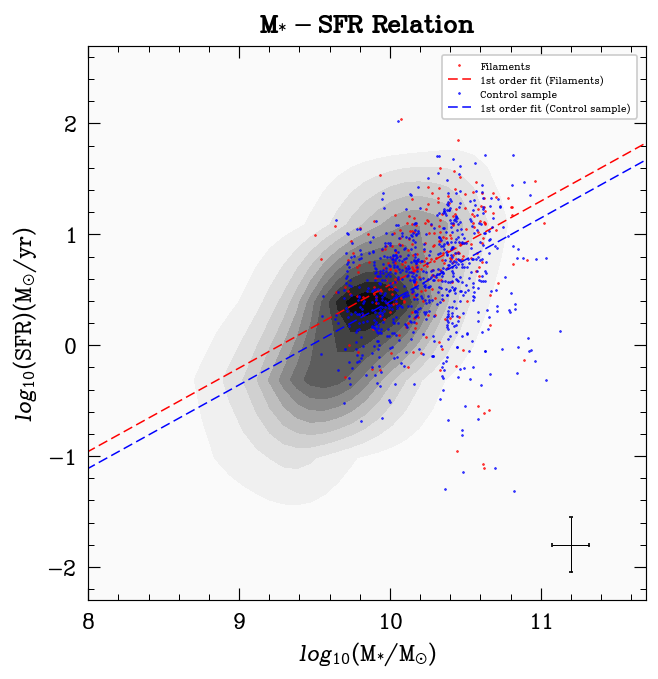

In [3]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.2,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_SFR):max(GAMA_SFR):70j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA')
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

# Sample +  fit
plt.plot(fil_M,fil_SFR,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [0.7523, -6.9766]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Filaments)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(filclone_M,filclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7523, -7.1289]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Tendrils

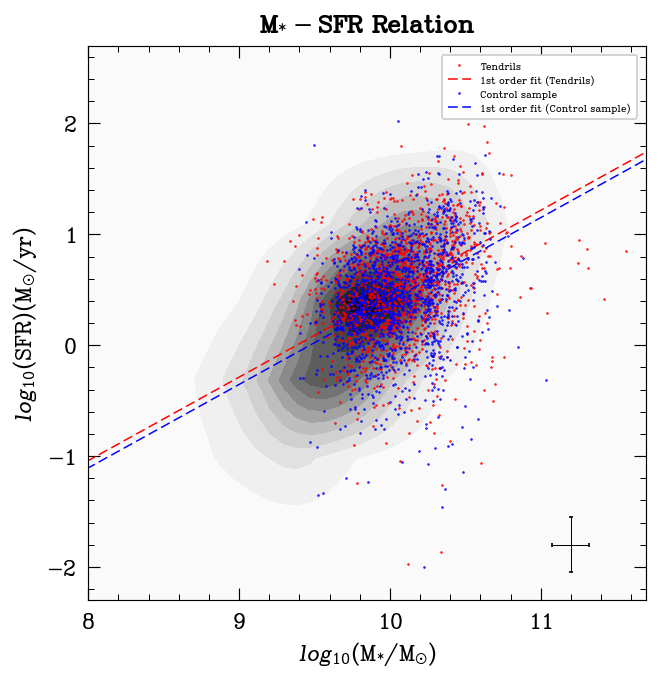

In [4]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.2,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_SFR):max(GAMA_SFR):70j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA')
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

# Sample +  fit
plt.plot(tendril_M,tendril_SFR,".",color='red',markersize = 1, label = 'Tendrils')
coefficients = [0.7523, -7.0590]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Tendrils)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(tendrilclone_M,tendrilclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7523, -7.1249]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Voids

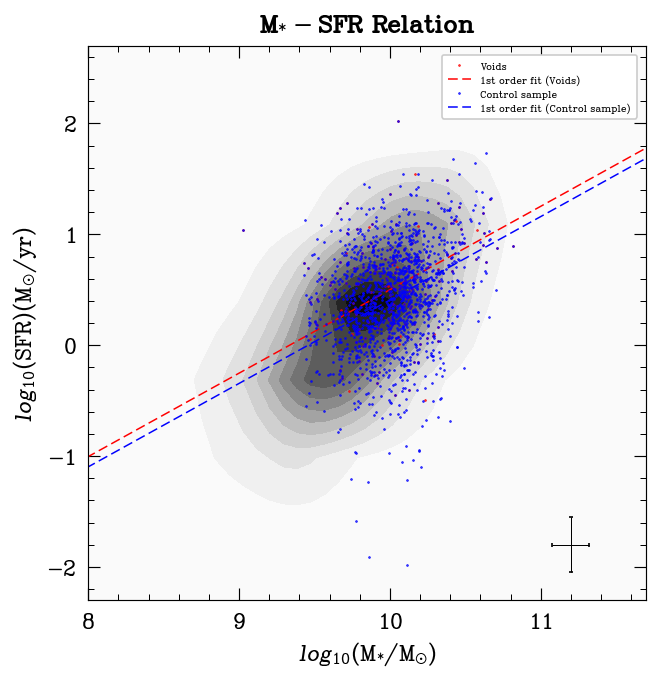

In [5]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.2,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_SFR):max(GAMA_SFR):70j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA')
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

# Sample +  fit
plt.plot(void_M,void_SFR,".",color='red',markersize = 1, label = 'Voids')
coefficients = [0.7523, -7.0228]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Voids)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(voidclone_M,voidclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7523, -7.1154]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Resume

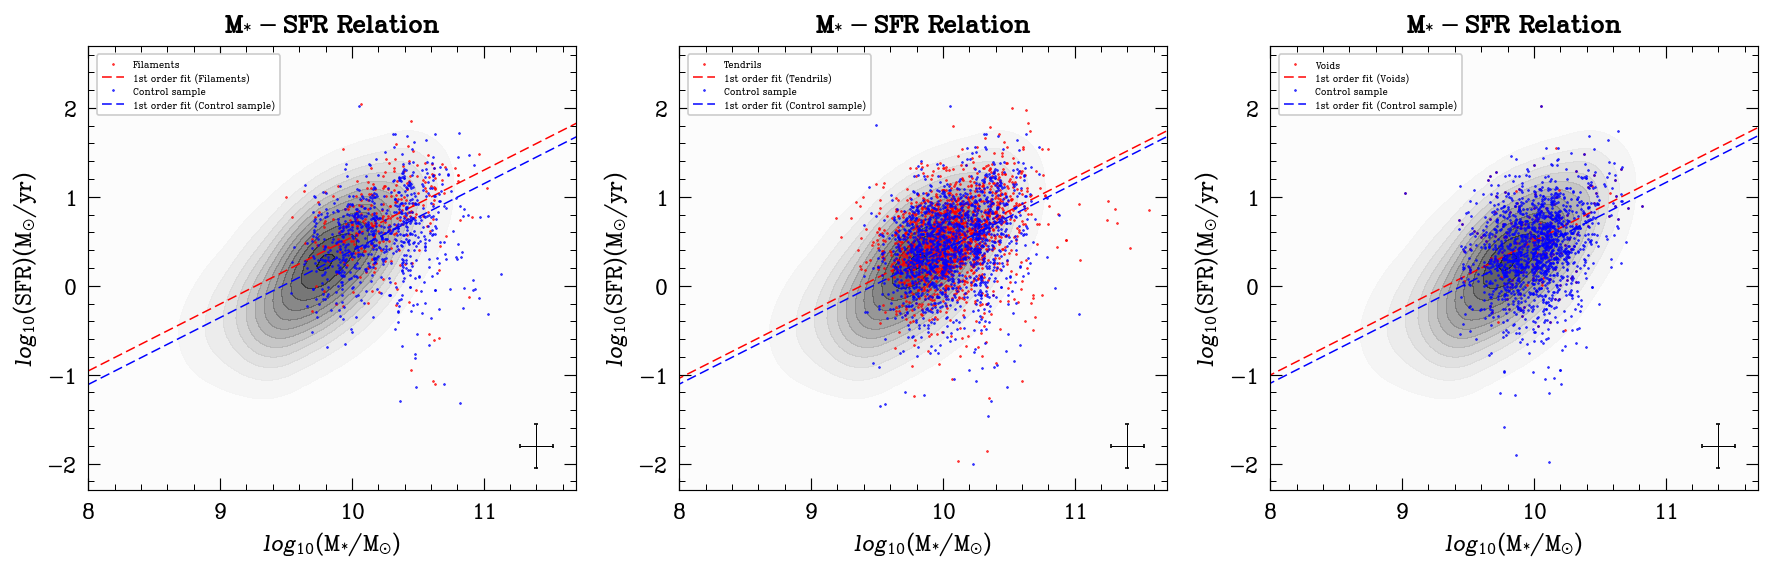

In [6]:
# Primero Gráfico
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.4,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_SFR):max(GAMA_SFR):500j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA', alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

plt.plot(fil_M,fil_SFR,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [0.7523, -6.9766]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Filaments)',linewidth = 0.9) 

plt.plot(filclone_M,filclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7523, -7.1289]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Segundo Gráfico
plt.subplot(1, 3, 2)
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.4,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_SFR):max(GAMA_SFR):500j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA', alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

plt.plot(tendril_M,tendril_SFR,".",color='red',markersize = 1, label = 'Tendrils')
coefficients = [0.7523, -7.0590]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Tendrils)',linewidth = 0.9) 

plt.plot(tendrilclone_M,tendrilclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7523, -7.1249]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left",fontsize = 6.5, frameon=True)

# Tercer Gráfico
plt.subplot(1, 3, 3)
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.4,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_SFR):max(GAMA_SFR):500j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA', alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

plt.plot(void_M,void_SFR,".",color='red',markersize = 1, label = 'Voids')
coefficients = [0.7523, -7.0228]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Voids)',linewidth = 0.9) 

plt.plot(voidclone_M,voidclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7523, -7.1154]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

plt.tight_layout()
plt.savefig(os.path.join("./Images","M_SFR_Relation_LS.pdf"),bbox_inches="tight")
plt.show()

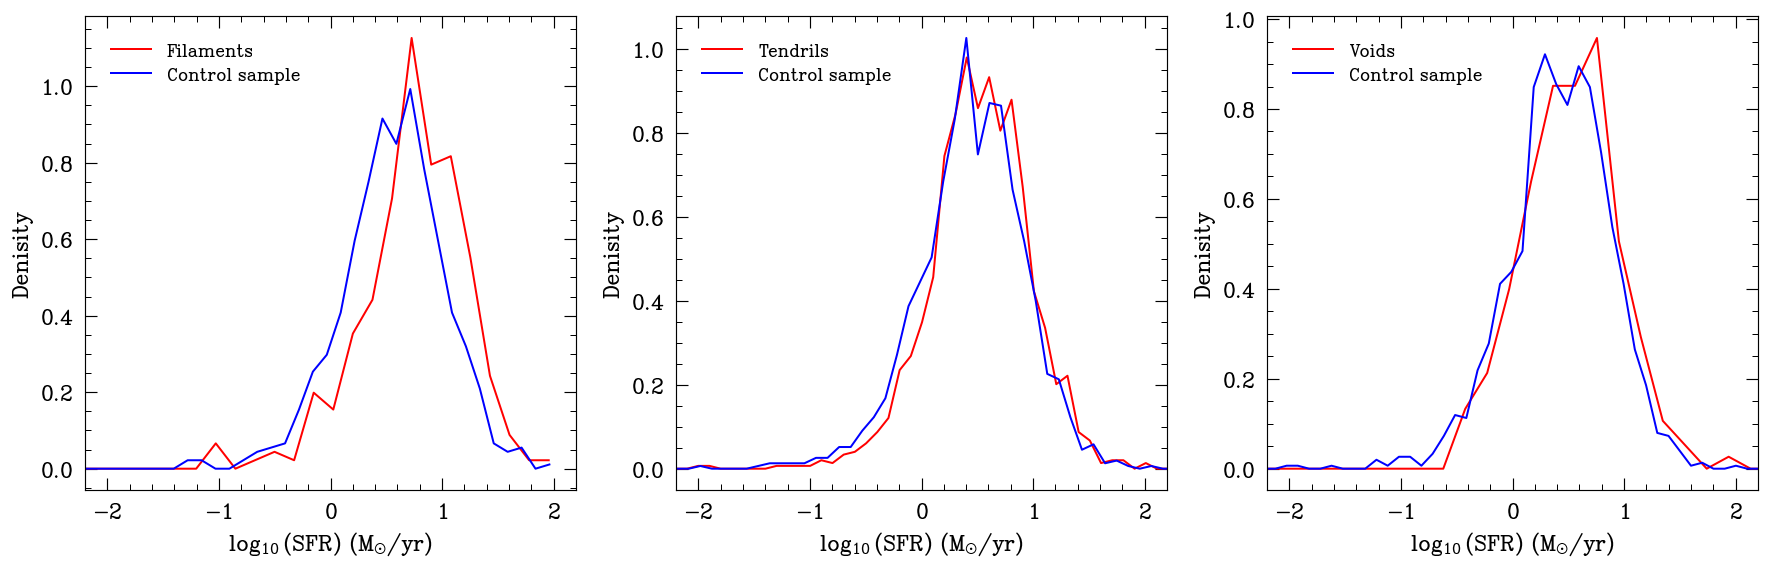

In [7]:
plt.figure(figsize=(15, 5))

# Creación del primer gráfico
fil_SFR_clean = [x for x in fil_SFR if (not np.isnan(x)) and (x != np.inf)]
filclone_SFR_clean = [x for x in filclone_SFR if (not np.isnan(x)) and (x != np.inf)]

counts_fil, bins_fil = np.histogram(fil_SFR_clean, bins='fd', density=True)
counts_filclone, bins_filclone = np.histogram(filclone_SFR_clean, bins='fd', density=True)
bins_fil_midpoints = 0.5 * (bins_fil[:-1] + bins_fil[1:])
bins_filclone_midpoints = 0.5 * (bins_filclone[:-1] + bins_filclone[1:])

plt.subplot(1, 3, 1)
plt.plot(bins_fil_midpoints, counts_fil, color='red', linestyle='-')
plt.plot(bins_filclone_midpoints, counts_filclone, color='blue', linestyle='-')
plt.legend(['Filaments', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('$\log_{10}(\mathrm{SFR})$ (M$_{\odot}$/yr)')
plt.ylabel('Denisity')
plt.xlim(-2.2, 2.2)

# Creación del segundo gráfico
tendril_SFR_clean = [x for x in tendril_SFR if (not np.isnan(x)) and (x != np.inf)]
tendrilclone_SFR_clean = [x for x in tendrilclone_SFR if (not np.isnan(x)) and (x != np.inf)]

counts_tendril, bins_tendril = np.histogram(tendril_SFR_clean, bins='fd', density=True)
counts_tendrilclone, bins_tendrilclone = np.histogram(tendrilclone_SFR_clean, bins='fd', density=True)
bins_tendril_midpoints = 0.5 * (bins_tendril[:-1] + bins_tendril[1:])
bins_tendrilclone_midpoints = 0.5 * (bins_tendrilclone[:-1] + bins_tendrilclone[1:])

plt.subplot(1, 3, 2)
plt.plot(bins_tendril_midpoints, counts_tendril, color='red', linestyle='-')
plt.plot(bins_tendrilclone_midpoints, counts_tendrilclone, color='blue', linestyle='-')
plt.legend(['Tendrils', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('$\log_{10}(\mathrm{SFR})$ (M$_{\odot}$/yr)')
plt.ylabel('Denisity')
plt.xlim(-2.2, 2.2)

# Creación del tercer gráfico
void_SFR_clean = [x for x in void_SFR if (not np.isnan(x)) and (x != np.inf)]
voidclone_SFR_clean = [x for x in voidclone_SFR if (not np.isnan(x)) and (x != np.inf)]

counts_void, bins_void = np.histogram(void_SFR_clean, bins='fd', density=True)
counts_voidclone, bins_voidclone = np.histogram(voidclone_SFR_clean, bins='fd', density=True)
bins_void_midpoints = 0.5 * (bins_void[:-1] + bins_void[1:])
bins_voidclone_midpoints = 0.5 * (bins_voidclone[:-1] + bins_voidclone[1:])

plt.subplot(1, 3, 3)
plt.plot(bins_void_midpoints, counts_void, color='red', linestyle='-')
plt.plot(bins_voidclone_midpoints, counts_voidclone, color='blue', linestyle='-')
plt.legend(['Voids', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('$\log_{10}(\mathrm{SFR})$ (M$_{\odot}$/yr)')
plt.ylabel('Denisity')
plt.xlim(-2.2, 2.2)

plt.tight_layout()
plt.savefig(os.path.join("./Images","Hist_M_SFR_Relation.pdf"),bbox_inches="tight")
plt.show()

### M-Z Relation

#### Filaments

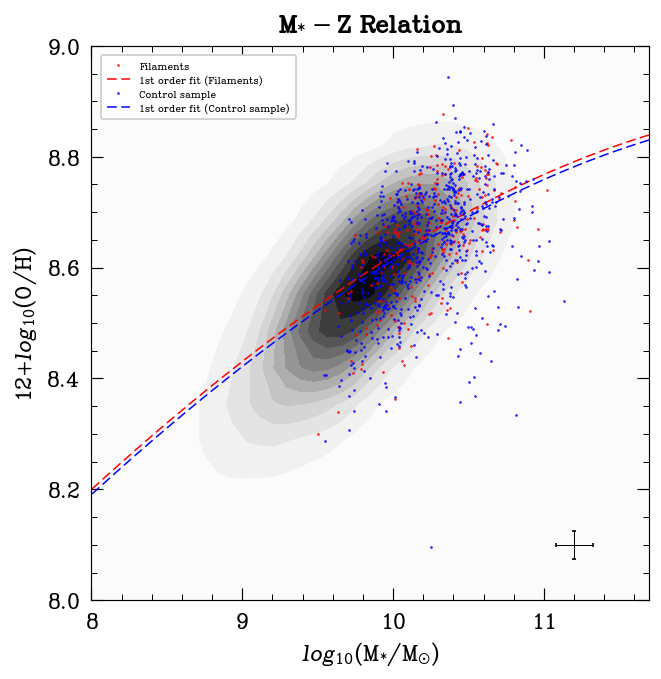

In [8]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.2,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_Z):max(GAMA_Z):70j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

# Sample +  fit
plt.plot(fil_M,fil_Z,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [-0.00105, 0.0087, 0.3107, 5.6950]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Filaments)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(filclone_M,filclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.00105, 0.0087, 0.3107, 5.6859]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Tendrils

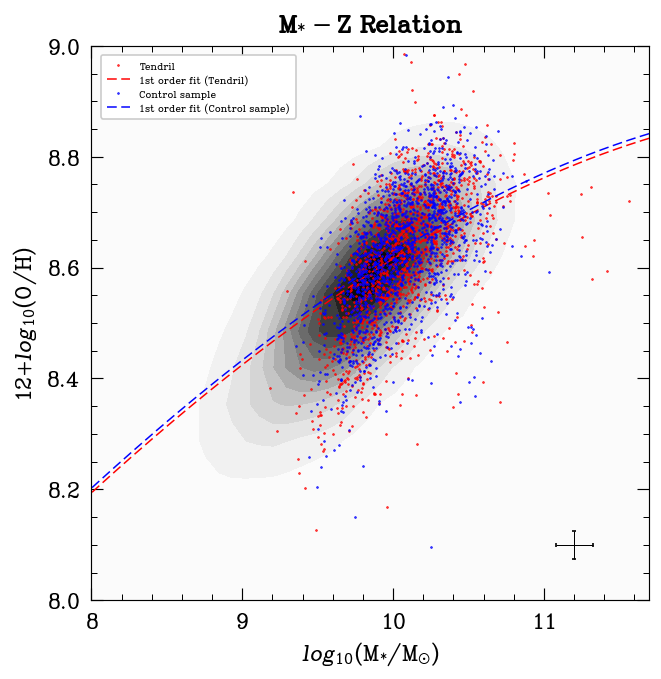

In [9]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.2,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_Z):max(GAMA_Z):70j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

# Sample +  fit
plt.plot(tendril_M,tendril_Z,".",color='red',markersize = 1, label = 'Tendril')
coefficients = [-0.00105, 0.0087, 0.3107, 5.6890]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Tendril)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(tendrilclone_M,tendrilclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.00105, 0.0087, 0.3107, 5.6974]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Voids

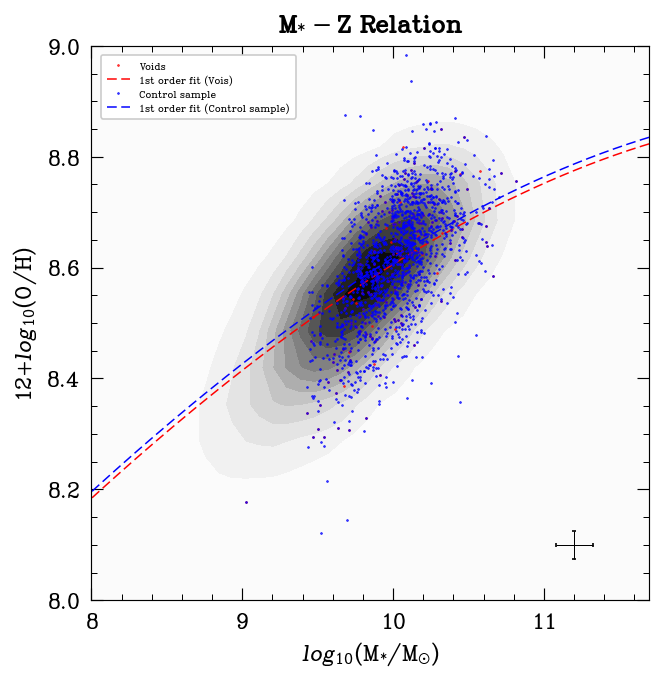

In [10]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.2,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_Z):max(GAMA_Z):70j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

# Sample +  fit
plt.plot(void_M,void_Z,".",color='red',markersize = 1, label = 'Voids')
coefficients = [-0.00105, 0.0087, 0.3107, 5.6790]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Vois)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(voidclone_M,voidclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.00105, 0.0087, 0.3107, 5.6908]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Resume

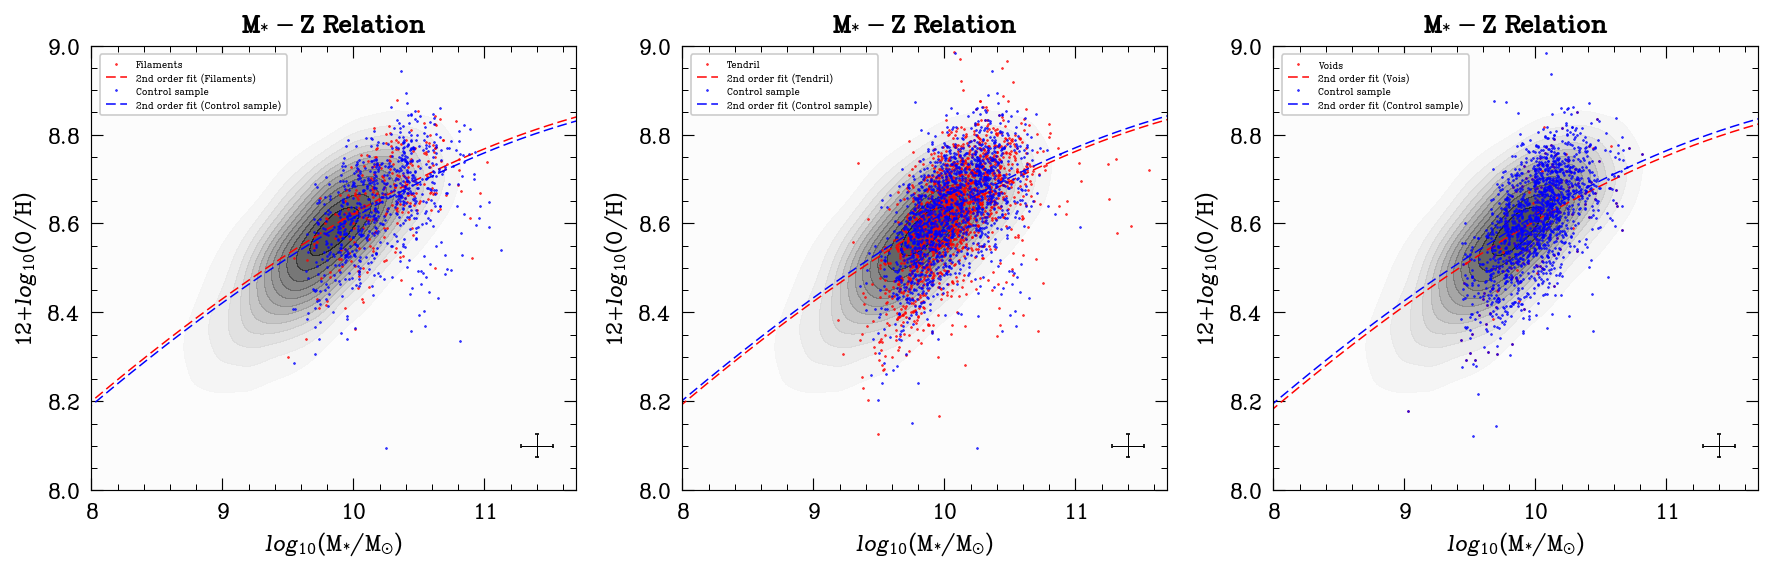

In [11]:
# Primero Gráfico
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.4,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_Z):max(GAMA_Z):500j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12, alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

plt.plot(fil_M,fil_Z,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [-0.00105, 0.0087, 0.3107, 5.6950]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '2nd order fit (Filaments)',linewidth = 0.9) 

plt.plot(filclone_M,filclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.00105, 0.0087, 0.3107, 5.6859]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '2nd order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Segundo Gráfico
plt.subplot(1, 3, 2)
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.4,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_Z):max(GAMA_Z):500j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12, alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

plt.plot(tendril_M,tendril_Z,".",color='red',markersize = 1, label = 'Tendril')
coefficients = [-0.00105, 0.0087, 0.3107, 5.6890]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '2nd order fit (Tendril)',linewidth = 0.9) 

plt.plot(tendrilclone_M,tendrilclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.00105, 0.0087, 0.3107, 5.6974]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '2nd order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Tercer Gráfico
plt.subplot(1, 3, 3)
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.4,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_Z):max(GAMA_Z):500j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12, alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

plt.plot(void_M,void_Z,".",color='red',markersize = 1, label = 'Voids')
coefficients = [-0.00105, 0.0087, 0.3107, 5.6790]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '2nd order fit (Vois)',linewidth = 0.9) 

plt.plot(voidclone_M,voidclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.00105, 0.0087, 0.3107, 5.6908]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '2nd order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

plt.tight_layout()
plt.savefig(os.path.join("./Images","M_Z_Relation_LS.pdf"),bbox_inches="tight")
plt.show()

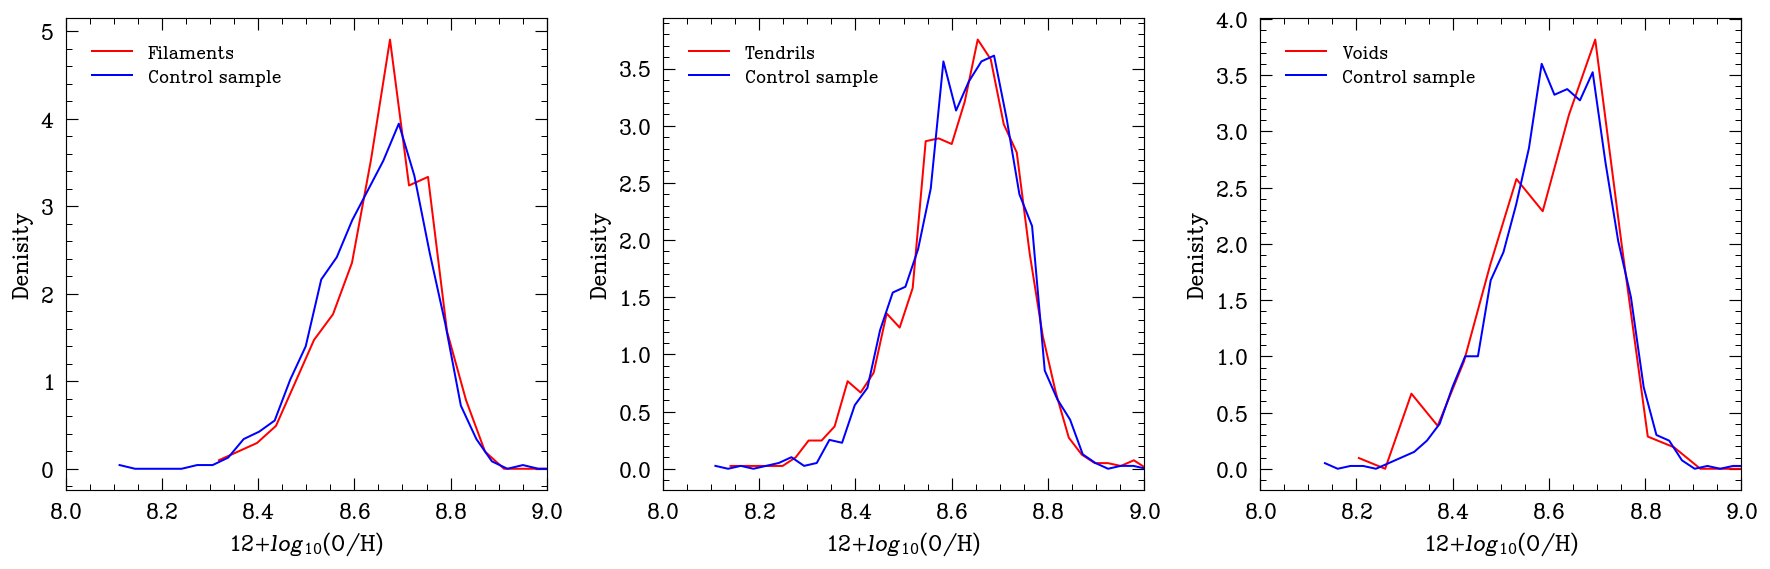

In [12]:
plt.figure(figsize=(15, 5))

# Creación del primer gráfico
fil_Z_clean = [x for x in fil_Z if (not np.isnan(x)) and (x != np.inf)]
filclone_Z_clean = [x for x in filclone_Z if (not np.isnan(x)) and (x != np.inf)]

counts_fil, bins_fil = np.histogram(fil_Z_clean, bins='fd', density=True)
counts_filclone, bins_filclone = np.histogram(filclone_Z_clean, bins='fd', density=True)
bins_fil_midpoints = 0.5 * (bins_fil[:-1] + bins_fil[1:])
bins_filclone_midpoints = 0.5 * (bins_filclone[:-1] + bins_filclone[1:])

plt.subplot(1, 3, 1)
plt.plot(bins_fil_midpoints, counts_fil, color='red', linestyle='-')
plt.plot(bins_filclone_midpoints, counts_filclone, color='blue', linestyle='-')
plt.legend(['Filaments', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('12+$log_{10}$(O/H)') 
plt.ylabel('Denisity')
plt.xlim(8.,9.)

# Creación del segundo gráfico
tendril_Z_clean = [x for x in tendril_Z if (not np.isnan(x)) and (x != np.inf)]
tendrilclone_Z_clean = [x for x in tendrilclone_Z if (not np.isnan(x)) and (x != np.inf)]

counts_tendril, bins_tendril = np.histogram(tendril_Z_clean, bins='fd', density=True)
counts_tendrilclone, bins_tendrilclone = np.histogram(tendrilclone_Z_clean, bins='fd', density=True)
bins_tendril_midpoints = 0.5 * (bins_tendril[:-1] + bins_tendril[1:])
bins_tendrilclone_midpoints = 0.5 * (bins_tendrilclone[:-1] + bins_tendrilclone[1:])

plt.subplot(1, 3, 2)
plt.plot(bins_tendril_midpoints, counts_tendril, color='red', linestyle='-')
plt.plot(bins_tendrilclone_midpoints, counts_tendrilclone, color='blue', linestyle='-')
plt.legend(['Tendrils', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('12+$log_{10}$(O/H)')
plt.ylabel('Denisity')
plt.xlim(8.,9.)

# Creación del tercer gráfico
void_Z_clean = [x for x in void_Z if (not np.isnan(x)) and (x != np.inf)]
voidclone_Z_clean = [x for x in voidclone_Z if (not np.isnan(x)) and (x != np.inf)]

counts_void, bins_void = np.histogram(void_Z_clean, bins='fd', density=True)
counts_voidclone, bins_voidclone = np.histogram(voidclone_Z_clean, bins='fd', density=True)
bins_void_midpoints = 0.5 * (bins_void[:-1] + bins_void[1:])
bins_voidclone_midpoints = 0.5 * (bins_voidclone[:-1] + bins_voidclone[1:])

plt.subplot(1, 3, 3)
plt.plot(bins_void_midpoints, counts_void, color='red', linestyle='-')
plt.plot(bins_voidclone_midpoints, counts_voidclone, color='blue', linestyle='-')
plt.legend(['Voids', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('12+$log_{10}$(O/H)')
plt.ylabel('Denisity')
plt.xlim(8.,9.)

plt.tight_layout()
plt.savefig(os.path.join("./Images","Hist_M_Z_Relation.pdf"),bbox_inches="tight")
plt.show()

## Bayesian fits

Representamos los ajustes con MCMC.

### M-SFR Relation

#### Filaments

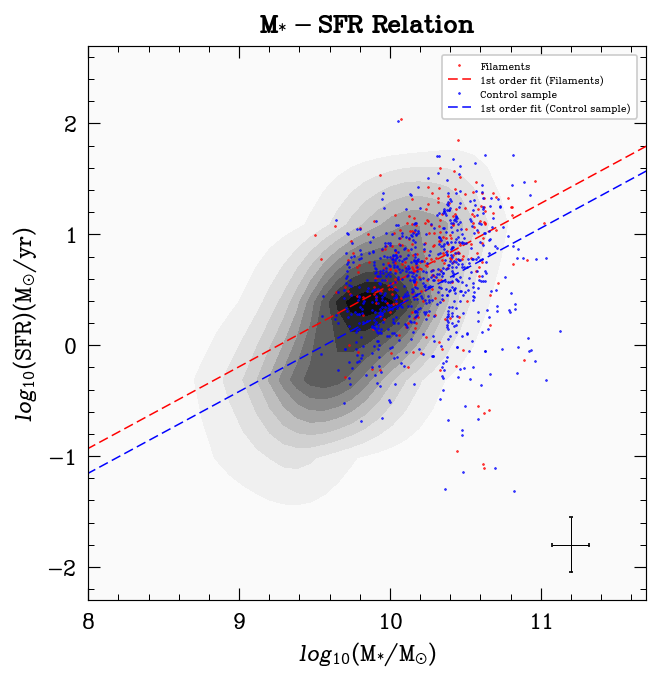

In [13]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.2,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_SFR):max(GAMA_SFR):70j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA')
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

# Sample +  fit
plt.plot(fil_M,fil_SFR,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [0.7366, -6.8235]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Filaments)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(filclone_M,filclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7366, -7.0474]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Tendrils

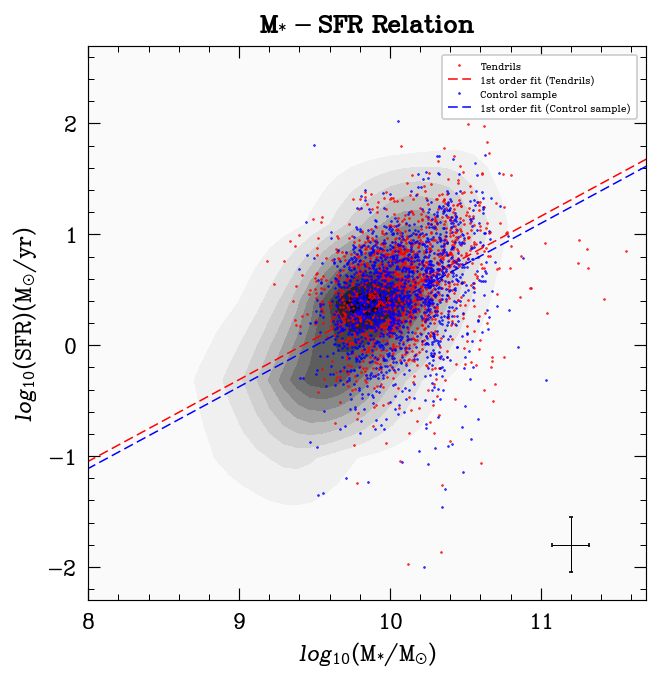

In [14]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.2,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_SFR):max(GAMA_SFR):70j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA')
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

# Sample +  fit
plt.plot(tendril_M,tendril_SFR,".",color='red',markersize = 1, label = 'Tendrils')
coefficients = [0.7366, -6.9403]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Tendrils)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(tendrilclone_M,tendrilclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7366, -7.0046]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Voids

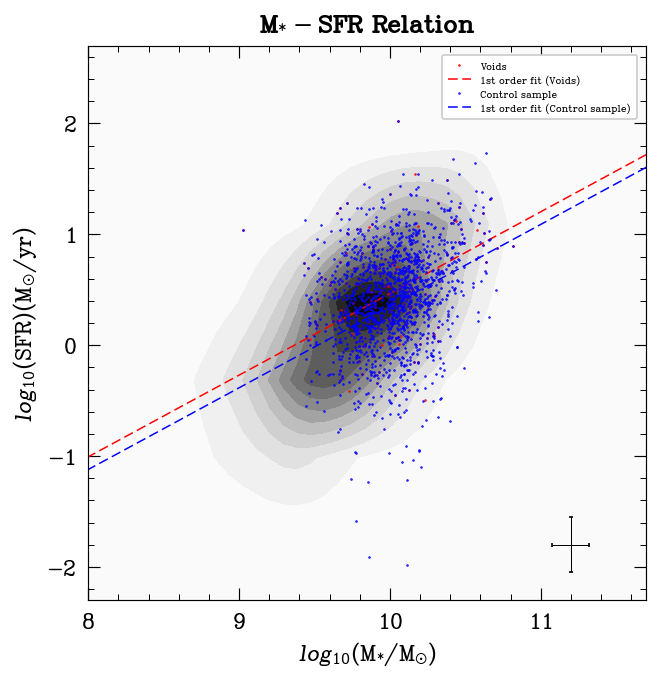

In [15]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.2,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_SFR):max(GAMA_SFR):70j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA')
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

# Sample +  fit
plt.plot(void_M,void_SFR,".",color='red',markersize = 1, label = 'Voids')
coefficients = [0.7366, -6.8995]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Voids)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(voidclone_M,voidclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7366, -7.0137]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Resume

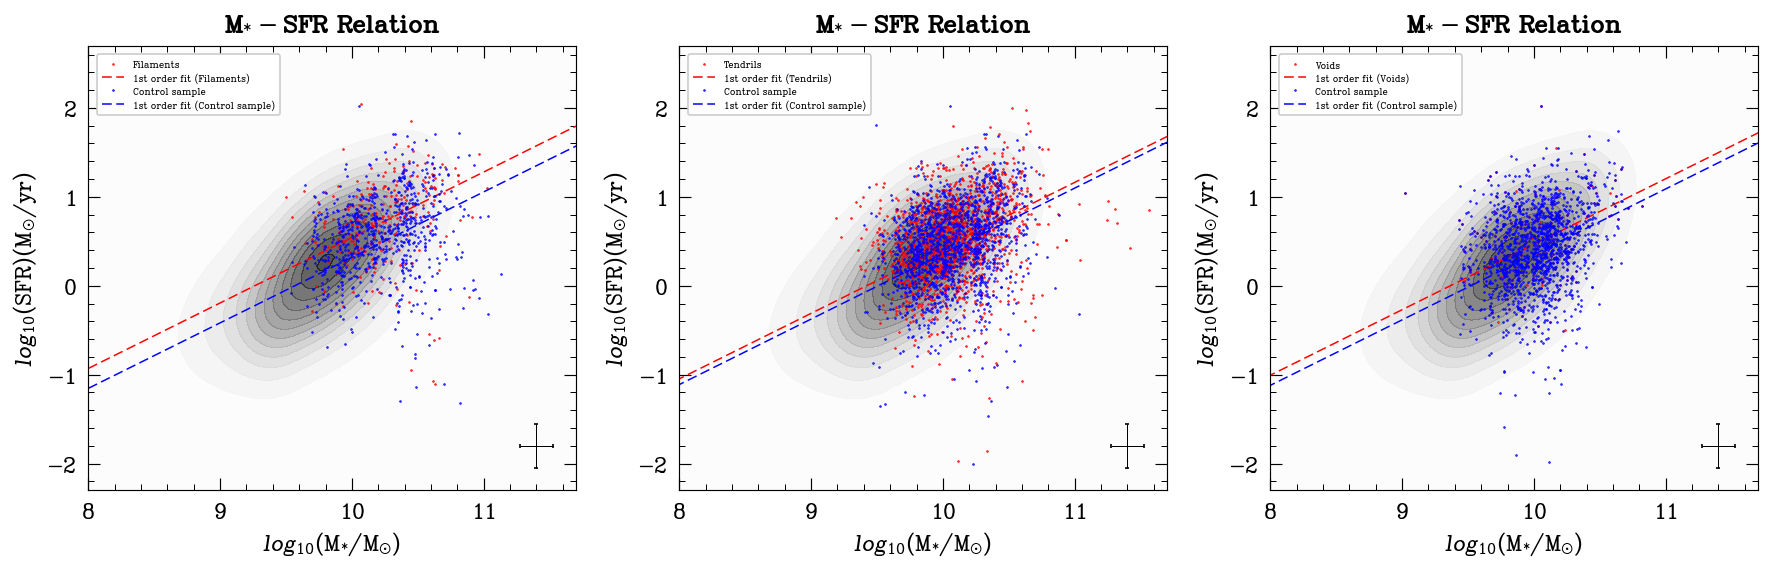

In [16]:
# Primero Gráfico
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.4,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_SFR):max(GAMA_SFR):500j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA', alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

plt.plot(fil_M,fil_SFR,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [0.7366, -6.8235]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Filaments)',linewidth = 0.9) 

plt.plot(filclone_M,filclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7366, -7.0474]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Segundo Gráfico
plt.subplot(1, 3, 2)
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.4,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_SFR):max(GAMA_SFR):500j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA', alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

plt.plot(tendril_M,tendril_SFR,".",color='red',markersize = 1, label = 'Tendrils')
coefficients = [0.7366, -6.9403]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Tendrils)',linewidth = 0.9) 

plt.plot(tendrilclone_M,tendrilclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7366, -7.0046]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Tercer Gráfico
plt.subplot(1, 3, 3)
plt.xlim(8,11.7)
plt.ylim(-2.3,2.7)
plt.errorbar(11.4,-1.8,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_logSFR']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_SFR])
xiSFR,yiSFR=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_SFR):max(GAMA_SFR):500j]
ziSFR=kde(np.vstack([xiSFR.flatten(),yiSFR.flatten()]))

plt.contourf(xiSFR,yiSFR,ziSFR.reshape(xiSFR.shape),cmap='Greys', levels = 12, label = 'GAMA', alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('$log_{10}(\mathrm{SFR})$(M$_{\odot}$/yr)')
plt.title('M$_{*}-$SFR Relation', weight = 'bold')

plt.plot(void_M,void_SFR,".",color='red',markersize = 1, label = 'Voids')
coefficients = [0.7366, -6.8995]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Voids)',linewidth = 0.9) 

plt.plot(voidclone_M,voidclone_SFR,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [0.7366, -7.0137]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

plt.tight_layout()
plt.savefig(os.path.join("./Images","M_SFR_Relation_B.pdf"),bbox_inches="tight")
plt.show()

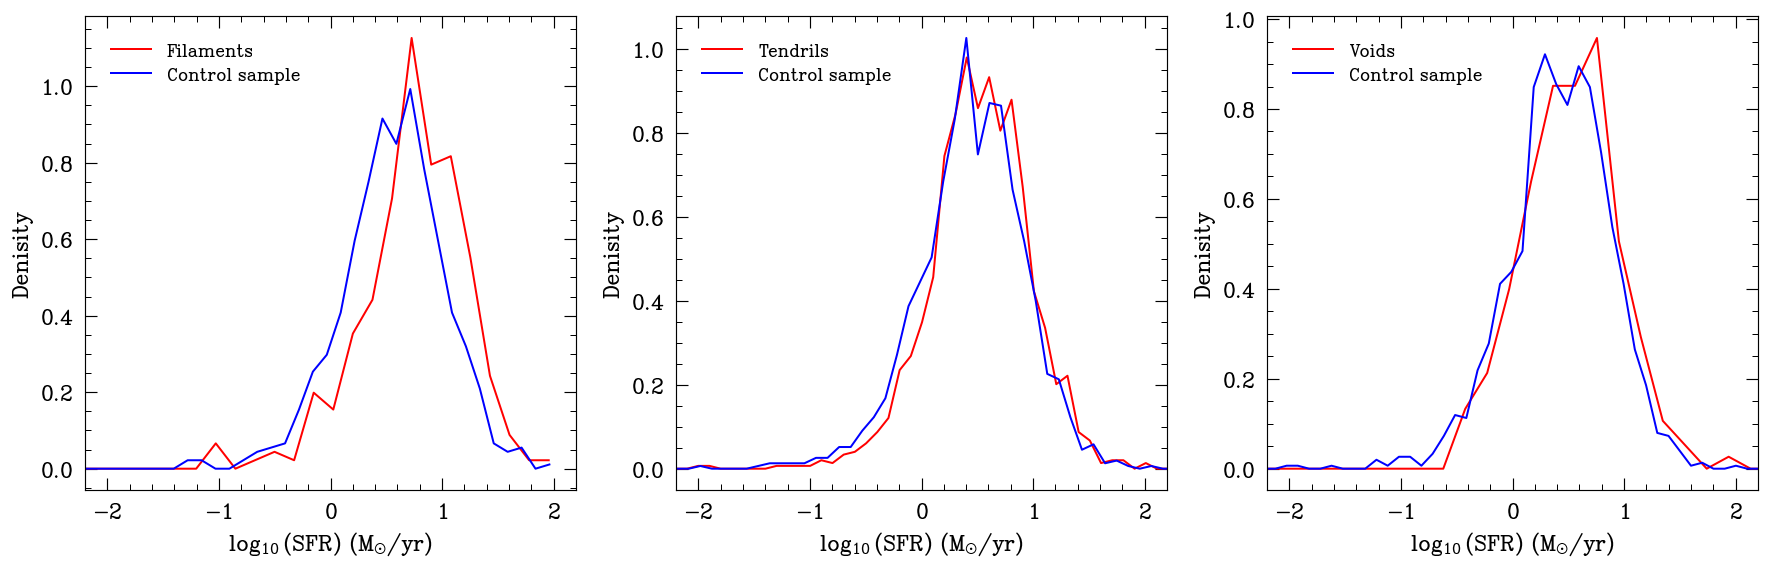

In [17]:
plt.figure(figsize=(15, 5))

# Creación del primer gráfico
fil_SFR_clean = [x for x in fil_SFR if (not np.isnan(x)) and (x != np.inf)]
filclone_SFR_clean = [x for x in filclone_SFR if (not np.isnan(x)) and (x != np.inf)]

counts_fil, bins_fil = np.histogram(fil_SFR_clean, bins='fd', density=True)
counts_filclone, bins_filclone = np.histogram(filclone_SFR_clean, bins='fd', density=True)
bins_fil_midpoints = 0.5 * (bins_fil[:-1] + bins_fil[1:])
bins_filclone_midpoints = 0.5 * (bins_filclone[:-1] + bins_filclone[1:])

plt.subplot(1, 3, 1)
plt.plot(bins_fil_midpoints, counts_fil, color='red', linestyle='-')
plt.plot(bins_filclone_midpoints, counts_filclone, color='blue', linestyle='-')
plt.legend(['Filaments', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('$\log_{10}(\mathrm{SFR})$ (M$_{\odot}$/yr)')
plt.ylabel('Denisity')
plt.xlim(-2.2, 2.2)

# Creación del segundo gráfico
tendril_SFR_clean = [x for x in tendril_SFR if (not np.isnan(x)) and (x != np.inf)]
tendrilclone_SFR_clean = [x for x in tendrilclone_SFR if (not np.isnan(x)) and (x != np.inf)]

counts_tendril, bins_tendril = np.histogram(tendril_SFR_clean, bins='fd', density=True)
counts_tendrilclone, bins_tendrilclone = np.histogram(tendrilclone_SFR_clean, bins='fd', density=True)
bins_tendril_midpoints = 0.5 * (bins_tendril[:-1] + bins_tendril[1:])
bins_tendrilclone_midpoints = 0.5 * (bins_tendrilclone[:-1] + bins_tendrilclone[1:])

plt.subplot(1, 3, 2)
plt.plot(bins_tendril_midpoints, counts_tendril, color='red', linestyle='-')
plt.plot(bins_tendrilclone_midpoints, counts_tendrilclone, color='blue', linestyle='-')
plt.legend(['Tendrils', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('$\log_{10}(\mathrm{SFR})$ (M$_{\odot}$/yr)')
plt.ylabel('Denisity')
plt.xlim(-2.2, 2.2)

# Creación del tercer gráfico
void_SFR_clean = [x for x in void_SFR if (not np.isnan(x)) and (x != np.inf)]
voidclone_SFR_clean = [x for x in voidclone_SFR if (not np.isnan(x)) and (x != np.inf)]

counts_void, bins_void = np.histogram(void_SFR_clean, bins='fd', density=True)
counts_voidclone, bins_voidclone = np.histogram(voidclone_SFR_clean, bins='fd', density=True)
bins_void_midpoints = 0.5 * (bins_void[:-1] + bins_void[1:])
bins_voidclone_midpoints = 0.5 * (bins_voidclone[:-1] + bins_voidclone[1:])

plt.subplot(1, 3, 3)
plt.plot(bins_void_midpoints, counts_void, color='red', linestyle='-')
plt.plot(bins_voidclone_midpoints, counts_voidclone, color='blue', linestyle='-')
plt.legend(['Voids', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('$\log_{10}(\mathrm{SFR})$ (M$_{\odot}$/yr)')
plt.ylabel('Denisity')
plt.xlim(-2.2, 2.2)

plt.tight_layout()
plt.savefig(os.path.join("./Images","Hist_M_SFR_Relation.pdf"),bbox_inches="tight")
plt.show()

### M-Z Relation

#### Filaments

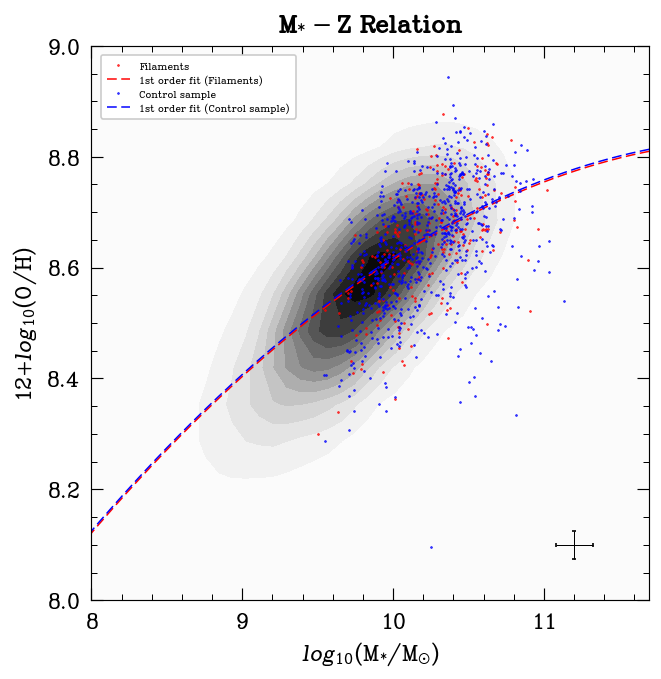

In [18]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.2,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_Z):max(GAMA_Z):70j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

# Sample +  fit
plt.plot(fil_M,fil_Z,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [-0.0356, 0.8874, 3.3006]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Filaments)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(filclone_M,filclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.0356, 0.8874, 3.3042]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Tendrils

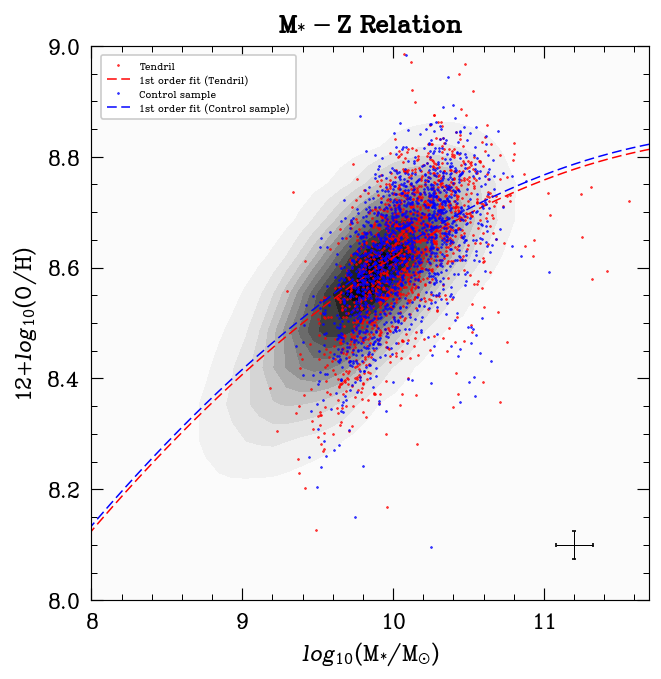

In [19]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.2,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_Z):max(GAMA_Z):70j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

# Sample +  fit
plt.plot(tendril_M,tendril_Z,".",color='red',markersize = 1, label = 'Tendril')
coefficients = [-0.0356, 0.8874, 3.3041]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Tendril)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(tendrilclone_M,tendrilclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.0356, 0.8874, 3.3133]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Voids

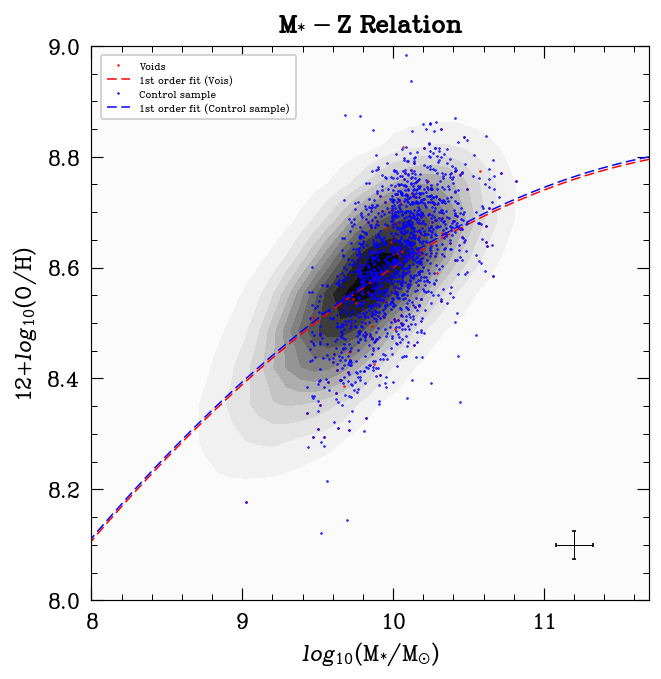

In [20]:
# Density Scatter Plot
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.2,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):70j,min(GAMA_Z):max(GAMA_Z):70j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

# Sample +  fit
plt.plot(void_M,void_Z,".",color='red',markersize = 1, label = 'Voids')
coefficients = [-0.0356, 0.8874, 3.2860]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '1st order fit (Vois)',linewidth = 0.9) 

# Control Sample + fit
plt.plot(voidclone_M,voidclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.0356, 0.8874, 3.2907]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '1st order fit (Control sample)',linewidth = 0.9) 

plt.legend(fontsize = 7., frameon=True)
plt.show()

#### Resume

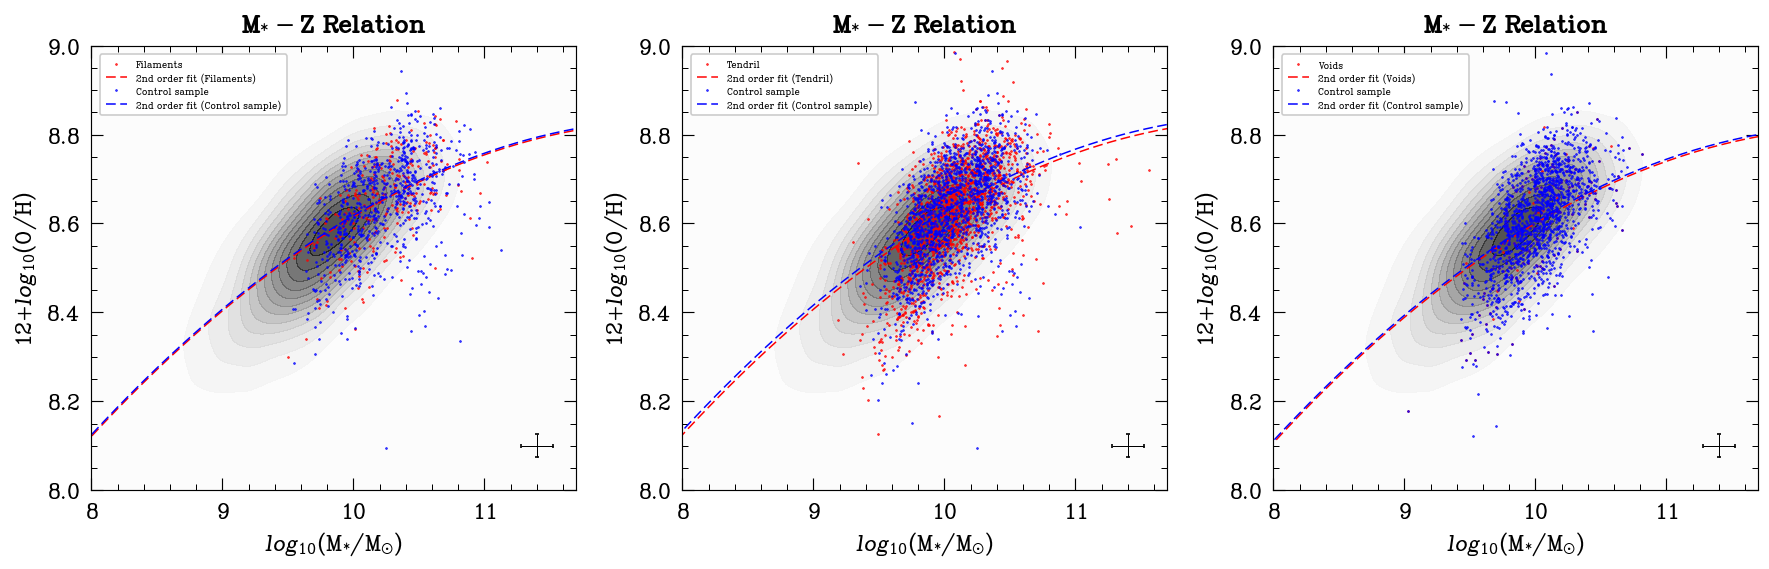

In [21]:
# Primero Gráfico
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.4,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_Z):max(GAMA_Z):500j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12, alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

plt.plot(fil_M,fil_Z,".",color='red',markersize = 1, label = 'Filaments')
coefficients = [-0.0356, 0.8874, 3.3006]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '2nd order fit (Filaments)',linewidth = 0.9) 

plt.plot(filclone_M,filclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.0356, 0.8874, 3.3042]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '2nd order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Segundo Gráfico
plt.subplot(1, 3, 2)
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.4,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_Z):max(GAMA_Z):500j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12, alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

plt.plot(tendril_M,tendril_Z,".",color='red',markersize = 1, label = 'Tendril')
coefficients = [-0.0356, 0.8874, 3.3041]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '2nd order fit (Tendril)',linewidth = 0.9) 

plt.plot(tendrilclone_M,tendrilclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.0356, 0.8874, 3.3133]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '2nd order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

# Tercer Gráfico
plt.subplot(1, 3, 3)
plt.xlim(8,11.7)
plt.ylim(8.,9.)
plt.errorbar(11.4,8.1,xerr=np.median(GAMA['e_logmstar']),yerr=np.median(GAMA['e_METALLICIY']),color="black",elinewidth=0.6,capsize=1.2)

kde=stats.gaussian_kde([GAMA_M,GAMA_Z])
xiZ,yiZ=np.mgrid[min(GAMA_M):max(GAMA_M):500j,min(GAMA_Z):max(GAMA_Z):500j]
ziZ=kde(np.vstack([xiZ.flatten(),yiZ.flatten()]))

plt.contourf(xiZ,yiZ,ziZ.reshape(xiZ.shape),cmap='Greys', levels = 12, alpha = 0.7)
plt.xlabel('$log_{10}$(M$_{*}$/M$_{\odot}$)')
plt.ylabel('12+$log_{10}$(O/H)')
plt.title('M$_{*}-$Z Relation',weight = 'bold')

plt.plot(void_M,void_Z,".",color='red',markersize = 1, label = 'Voids')
coefficients = [-0.0356, 0.8874, 3.2860]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'red',label = '2nd order fit (Voids)',linewidth = 0.9) 

plt.plot(voidclone_M,voidclone_Z,".",color='blue',markersize = 1, label = 'Control sample') 
coefficients = [-0.0356, 0.8874, 3.2907]; x = np.linspace(7, 12, 400)
plt.plot(x, np.polyval(coefficients, x),"--" ,color = 'blue',label = '2nd order fit (Control sample)',linewidth = 0.9) 

plt.legend(loc="upper left" ,fontsize = 6.5, frameon=True)

plt.tight_layout()
plt.savefig(os.path.join("./Images","M_Z_Relation_B.pdf"),bbox_inches="tight") 
plt.show()

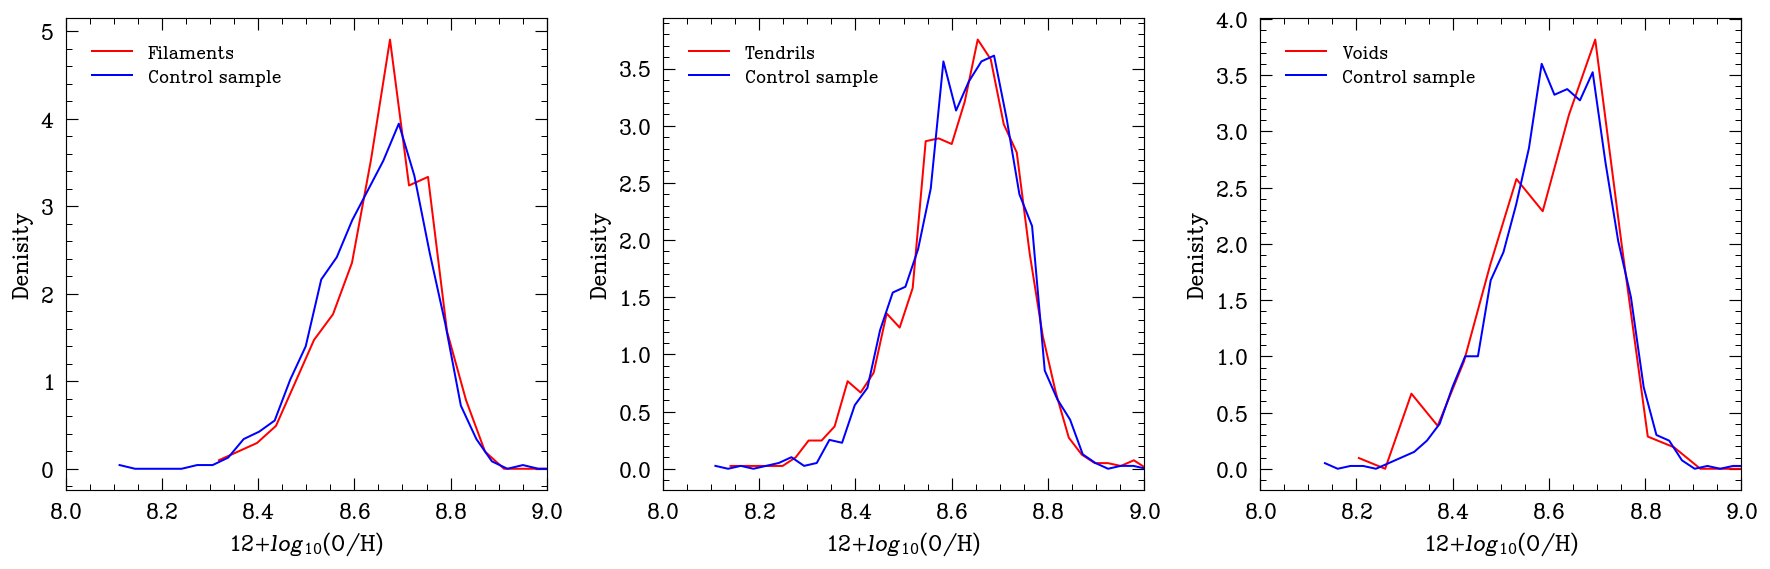

In [22]:
plt.figure(figsize=(15, 5))

# Creación del primer gráfico
fil_Z_clean = [x for x in fil_Z if (not np.isnan(x)) and (x != np.inf)]
filclone_Z_clean = [x for x in filclone_Z if (not np.isnan(x)) and (x != np.inf)]

counts_fil, bins_fil = np.histogram(fil_Z_clean, bins='fd', density=True)
counts_filclone, bins_filclone = np.histogram(filclone_Z_clean, bins='fd', density=True)
bins_fil_midpoints = 0.5 * (bins_fil[:-1] + bins_fil[1:])
bins_filclone_midpoints = 0.5 * (bins_filclone[:-1] + bins_filclone[1:])

plt.subplot(1, 3, 1)
plt.plot(bins_fil_midpoints, counts_fil, color='red', linestyle='-')
plt.plot(bins_filclone_midpoints, counts_filclone, color='blue', linestyle='-')
plt.legend(['Filaments', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('12+$log_{10}$(O/H)') 
plt.ylabel('Denisity')
plt.xlim(8.,9.)

# Creación del segundo gráfico
tendril_Z_clean = [x for x in tendril_Z if (not np.isnan(x)) and (x != np.inf)]
tendrilclone_Z_clean = [x for x in tendrilclone_Z if (not np.isnan(x)) and (x != np.inf)]

counts_tendril, bins_tendril = np.histogram(tendril_Z_clean, bins='fd', density=True)
counts_tendrilclone, bins_tendrilclone = np.histogram(tendrilclone_Z_clean, bins='fd', density=True)
bins_tendril_midpoints = 0.5 * (bins_tendril[:-1] + bins_tendril[1:])
bins_tendrilclone_midpoints = 0.5 * (bins_tendrilclone[:-1] + bins_tendrilclone[1:])

plt.subplot(1, 3, 2)
plt.plot(bins_tendril_midpoints, counts_tendril, color='red', linestyle='-')
plt.plot(bins_tendrilclone_midpoints, counts_tendrilclone, color='blue', linestyle='-')
plt.legend(['Tendrils', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('12+$log_{10}$(O/H)')
plt.ylabel('Denisity')
plt.xlim(8.,9.)

# Creación del tercer gráfico
void_Z_clean = [x for x in void_Z if (not np.isnan(x)) and (x != np.inf)]
voidclone_Z_clean = [x for x in voidclone_Z if (not np.isnan(x)) and (x != np.inf)]

counts_void, bins_void = np.histogram(void_Z_clean, bins='fd', density=True)
counts_voidclone, bins_voidclone = np.histogram(voidclone_Z_clean, bins='fd', density=True)
bins_void_midpoints = 0.5 * (bins_void[:-1] + bins_void[1:])
bins_voidclone_midpoints = 0.5 * (bins_voidclone[:-1] + bins_voidclone[1:])

plt.subplot(1, 3, 3)
plt.plot(bins_void_midpoints, counts_void, color='red', linestyle='-')
plt.plot(bins_voidclone_midpoints, counts_voidclone, color='blue', linestyle='-')
plt.legend(['Voids', 'Control sample'], fontsize = 12, loc = "upper left")
plt.xlabel('12+$log_{10}$(O/H)')
plt.ylabel('Denisity')
plt.xlim(8.,9.)

plt.tight_layout()
plt.savefig(os.path.join("./Images","Hist_M_Z_Relation.pdf"),bbox_inches="tight")
plt.show()

## Coefficients plots

### Least squares fits

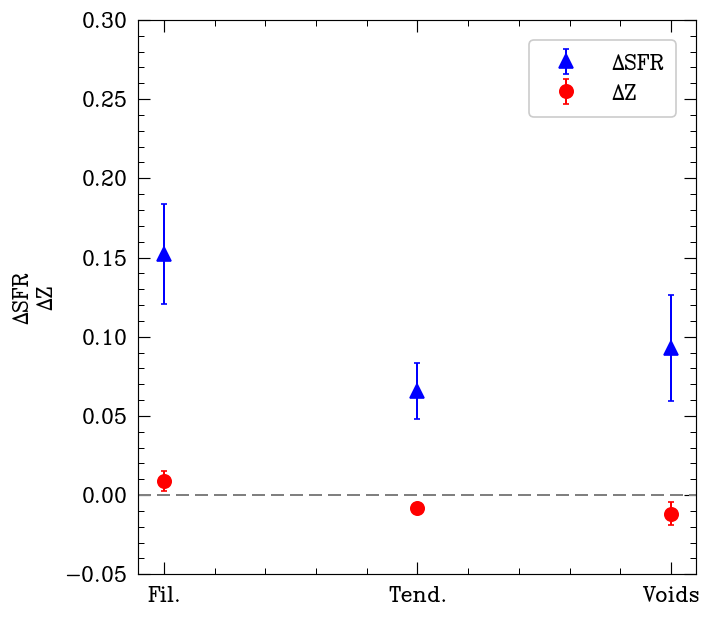

In [29]:
# Differences in coefficientes
galaxies = ['Fil.', 'Tend.', 'Voids']
difcoefSFR = [0.1523, 0.0659, 0.0926]
difcoefZ = [0.0091, -0.0083, -0.0118]

# Errors
errors_SFR = [float(np.sqrt(0.0271 ** 2 + 0.0162 ** 2)), 
              float(np.sqrt(0.0117 ** 2 + 0.0134 ** 2)),
              float(np.sqrt(0.0314 ** 2 + 0.0116 ** 2))]

errors_Z = [float(np.sqrt(0.0053 ** 2 + 0.0036 ** 2)), 
            float(np.sqrt(0.0025 ** 2 + 0.0025 ** 2)),
            float(np.sqrt(0.0068 ** 2 + 0.0024 ** 2))]

plt.errorbar(galaxies, difcoefSFR, yerr=errors_SFR, fmt='^', color='blue', label='ΔSFR', markersize = 8)
plt.errorbar(galaxies, difcoefZ, yerr=errors_Z, fmt='o', color='red', label='ΔZ',  markersize = 8)

plt.ylabel('ΔSFR\nΔZ')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(frameon=True)
plt.ylim(-0.05, 0.30)

plt.savefig(os.path.join("./Images","Coefficients_LS.pdf"),bbox_inches="tight") 
plt.show()

### Bayesian fits

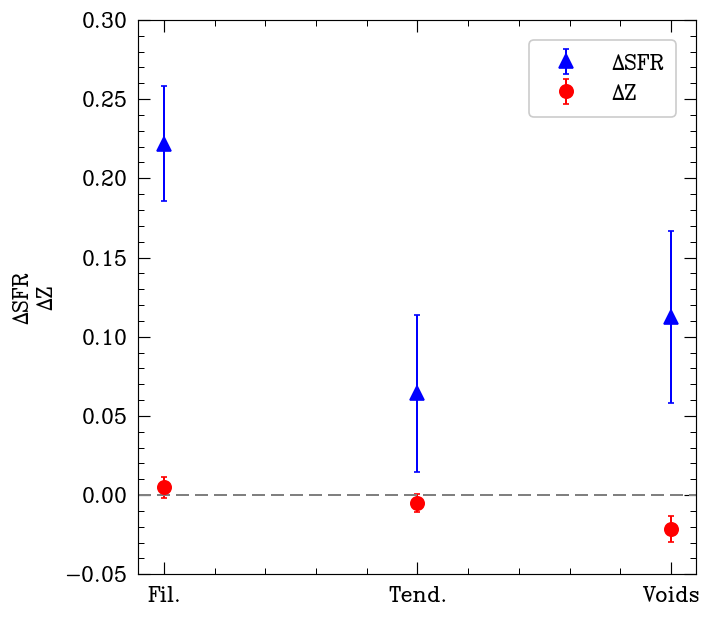

In [28]:
# Differences in coefficientes
galaxies = ['Fil.', 'Tend.', 'Voids']
difcoefSFR = [0.2219, 0.0644, 0.1126]
difcoefZ = [0.0049, -0.0048, -0.0213]

# Errors
errors_SFR = [float(np.sqrt(0.03058429 ** 2 + 0.01967468 ** 2)), 
              float(np.sqrt(0.03816372 ** 2 + 0.03168896 ** 2)),
              float(np.sqrt(0.03864730 ** 2 + 0.03802854 ** 2))]

errors_Z = [float(np.sqrt(0.0055 ** 2 + 0.00396 ** 2)), 
            float(np.sqrt(0.00458 ** 2 + 0.00349 ** 2)),
            float(np.sqrt(0.00687 ** 2 + 0.00450 ** 2))]

plt.errorbar(galaxies, difcoefSFR, yerr=errors_SFR, fmt='^', color='blue', label='ΔSFR', markersize = 8)
plt.errorbar(galaxies, difcoefZ, yerr=errors_Z, fmt='o', color='red', label='ΔZ',  markersize = 8)

plt.ylabel('ΔSFR\nΔZ')
plt.axhline(0, color='gray', linestyle='--')
plt.legend(frameon=True)
plt.ylim(-0.05, 0.30)

plt.savefig(os.path.join("./Images","Coefficients_B.pdf"),bbox_inches="tight") 
plt.show()

In [25]:
# Ejecution Time
b= time.time()
print('Tiempo de ejecución del cuaderno: ', round((b - a)/60,2), 'min')

Tiempo de ejecución del cuaderno:  17.04 min
